In [1]:
# MODIFY! 
# use StandardScaler! 
model_name = 'RandFoNFE'

# Import Libraries & Data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/ul-nfe-ns.csv')
X = df.drop('throughput',axis=1)
y = df['throughput']

---

# Scale Data

In [4]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [5]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Determine Hyperparameters

## Determine Max Features

In [6]:
# MODIFY!
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(warm_start=True)
model

RandomForestRegressor(warm_start=True)

In [7]:
p_grid = {
    'max_features':['auto', 'sqrt', 'log2']
}

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid =p_grid, 
    scoring='neg_mean_squared_error',
    cv=10, 
    verbose=1
)

In [10]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   39.2s finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(warm_start=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error', verbose=1)

In [11]:
grid_model.best_params_

{'max_features': 'auto'}

In [12]:
hp = pd.Series(name=f'{model_name} HP', data=grid_model.best_params_)

In [13]:
hp

max_features    auto
Name: RandFoNFE HP, dtype: object

In [14]:
hp.to_csv(f'./hyperparameters/{model_name}-hp.csv')

## Determine Number of Estimators

In [15]:
# the cell below takes around 14min to run!
# print(stop)

In [16]:
# MODIFY!
import time

estimators = [5,10,25,50,100,500,1000,2000]
scores_list = []

from sklearn.ensemble import RandomForestRegressor

for e in estimators: 
    start = time.time()
    print(f'Starting {e} estimators')
    score_model = RandomForestRegressor(
        n_estimators=e,
        max_features=grid_model.best_params_['max_features']
    )
    
    from sklearn.model_selection import cross_validate

    scores = cross_validate(
        score_model, 
        X_train, 
        y_train,
        scoring=[
            'neg_mean_absolute_error',
            'neg_mean_squared_error',
            'neg_root_mean_squared_error'
        ],
        cv=10
    )
    
    scores = pd.DataFrame(scores)
    scores
    mean_scores = scores.mean()
    scores_list.append(mean_scores)
    print(f'Done with {e} estimators')
    end = time.time()
    print(f'Elapsed time: {end - start}')
    print('\n')

Starting 5 estimators
Done with 5 estimators
Elapsed time: 2.1238059997558594


Starting 10 estimators
Done with 10 estimators
Elapsed time: 3.1475629806518555


Starting 25 estimators
Done with 25 estimators
Elapsed time: 6.7914979457855225


Starting 50 estimators
Done with 50 estimators
Elapsed time: 12.934858083724976


Starting 100 estimators
Done with 100 estimators
Elapsed time: 24.694162845611572


Starting 500 estimators
Done with 500 estimators
Elapsed time: 121.89933681488037


Starting 1000 estimators
Done with 1000 estimators
Elapsed time: 260.5975089073181


Starting 2000 estimators
Done with 2000 estimators
Elapsed time: 494.5819630622864




In [17]:
scores_df = pd.DataFrame(scores_list)

In [18]:
scores_df

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.205012,0.005914,-3.049253,-18.593728,-4.288233
1,0.308070,0.005704,-2.930909,-16.745894,-4.073271
2,0.670389,0.007425,-2.848866,-15.815872,-3.959069
3,1.279635,0.011201,-2.826264,-15.499005,-3.919313
4,2.449979,0.016490,-2.800052,-15.300432,-3.890447
5,12.093498,0.084982,-2.797907,-15.301506,-3.891844
6,25.861182,0.170998,-2.790042,-15.217314,-3.881390
7,49.044987,0.356268,-2.783829,-15.130904,-3.870247


In [19]:
scores_df['Est'] = estimators

In [20]:
scores_df

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,Est
0,0.205012,0.005914,-3.049253,-18.593728,-4.288233,5
1,0.308070,0.005704,-2.930909,-16.745894,-4.073271,10
2,0.670389,0.007425,-2.848866,-15.815872,-3.959069,25
3,1.279635,0.011201,-2.826264,-15.499005,-3.919313,50
4,2.449979,0.016490,-2.800052,-15.300432,-3.890447,100
5,12.093498,0.084982,-2.797907,-15.301506,-3.891844,500
6,25.861182,0.170998,-2.790042,-15.217314,-3.881390,1000
7,49.044987,0.356268,-2.783829,-15.130904,-3.870247,2000


# Export Scores for Number of Estimators

In [21]:
# mean_scores

In [22]:
scores_df = scores_df.rename(columns={
    'fit_time':'Fit Time',
    'score_time':'Score Time',
    'test_neg_mean_absolute_error':'MAE',
    'test_neg_mean_squared_error':'MSE',
    'test_neg_root_mean_squared_error':'RMSE'
})

In [23]:
scores_df

,Fit Time,Score Time,MAE,MSE,RMSE,Est
0,0.205012,0.005914,-3.049253,-18.593728,-4.288233,5
1,0.308070,0.005704,-2.930909,-16.745894,-4.073271,10
2,0.670389,0.007425,-2.848866,-15.815872,-3.959069,25
3,1.279635,0.011201,-2.826264,-15.499005,-3.919313,50
4,2.449979,0.016490,-2.800052,-15.300432,-3.890447,100
5,12.093498,0.084982,-2.797907,-15.301506,-3.891844,500
6,25.861182,0.170998,-2.790042,-15.217314,-3.881390,1000
7,49.044987,0.356268,-2.783829,-15.130904,-3.870247,2000


In [24]:
scores_df[['MAE','MSE','RMSE']] = scores_df[['MAE','MSE','RMSE']].apply(lambda x : abs(x))

In [25]:
scores_df
# we go for 25 estimations. Note that from 25 -> 50 estimations the error metrics worsen

,Fit Time,Score Time,MAE,MSE,RMSE,Est
0,0.205012,0.005914,3.049253,18.593728,4.288233,5
1,0.308070,0.005704,2.930909,16.745894,4.073271,10
2,0.670389,0.007425,2.848866,15.815872,3.959069,25
3,1.279635,0.011201,2.826264,15.499005,3.919313,50
4,2.449979,0.016490,2.800052,15.300432,3.890447,100
5,12.093498,0.084982,2.797907,15.301506,3.891844,500
6,25.861182,0.170998,2.790042,15.217314,3.881390,1000
7,49.044987,0.356268,2.783829,15.130904,3.870247,2000


In [26]:
scores_df.to_csv(f'./scores/{model_name}-score.csv')

In [27]:
pct_scores_df = scores_df.pct_change()

In [28]:
pct_scores_df

,Fit Time,Score Time,MAE,MSE,RMSE,Est
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.502694,-0.035463,-0.038811,-0.099379,-0.050128,1.0
2,1.176092,0.301608,-0.027992,-0.055537,-0.028037,1.5
3,0.908794,0.508535,-0.007934,-0.020035,-0.010042,1.0
4,0.914592,0.472179,-0.009274,-0.012812,-0.007365,1.0
5,3.936164,4.153706,-0.000766,0.000070,0.000359,4.0
6,1.138437,1.012163,-0.002811,-0.005502,-0.002686,1.0
7,0.896471,1.083466,-0.002227,-0.005678,-0.002871,1.0


In [29]:
pct_scores_df.style.background_gradient() 
# we choose index 4, 100 Estimations <- 
    # Score time decrease 3->4 & Score time increase dramatically 4->5
    # unsubstantial decrease MSE & RMSE 4->5 compared to 3->4

,Fit Time,Score Time,MAE,MSE,RMSE,Est
0,nan,nan,nan,nan,nan,nan
1,0.502694,-0.035463,-0.038811,-0.099379,-0.050128,1.000000
2,1.176092,0.301608,-0.027992,-0.055537,-0.028037,1.500000
3,0.908794,0.508535,-0.007934,-0.020035,-0.010042,1.000000
4,0.914592,0.472179,-0.009274,-0.012812,-0.007365,1.000000
5,3.936164,4.153706,-0.000766,0.000070,0.000359,4.000000
6,1.138437,1.012163,-0.002811,-0.005502,-0.002686,1.000000
7,0.896471,1.083466,-0.002227,-0.005678,-0.002871,1.000000


# Score Model

In [30]:
# MODIFY!
# adopt number of estimators from the previous section

score_model = RandomForestRegressor(n_estimators=100)
score_model

RandomForestRegressor()

In [31]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    score_model, 
    X_train, 
    y_train,
    scoring=[
        'neg_mean_absolute_error',
        'neg_mean_squared_error',
        'neg_root_mean_squared_error'
    ],
    cv=10
)

In [32]:
scores = pd.DataFrame(scores)

In [33]:
scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,3.067025,0.016162,-2.542489,-12.084737,-3.476311
1,2.391408,0.015462,-3.466968,-23.781754,-4.876654
2,2.329651,0.016393,-2.884387,-17.112726,-4.136753
3,2.505533,0.013076,-2.680065,-14.146603,-3.761197
4,2.325190,0.015044,-2.615952,-14.001057,-3.741799
5,2.365991,0.016735,-2.698014,-15.219076,-3.901163
6,2.371456,0.016718,-2.980601,-17.083150,-4.133177
7,2.300863,0.014222,-2.709519,-13.744940,-3.707417
8,2.740891,0.024279,-2.832157,-14.196382,-3.767809
9,2.471361,0.016125,-2.641351,-12.622558,-3.552824


In [34]:
mean_scores = scores.mean()

In [35]:
mean_scores

fit_time                             2.486937
score_time                           0.016422
test_neg_mean_absolute_error        -2.805150
test_neg_mean_squared_error        -15.399298
test_neg_root_mean_squared_error    -3.905510
dtype: float64

# Export Scores

In [36]:
mean_scores = mean_scores.rename(f'{model_name}')

In [37]:
mean_scores[[2,3,4]] = mean_scores[[2,3,4]].apply(abs)

In [38]:
# mean_scores

In [39]:
mean_scores = mean_scores.rename({
    'fit_time':'Fit Time',
    'score_time':'Score Time',
    'test_neg_mean_absolute_error':'MAE',
    'test_neg_mean_squared_error':'MSE',
    'test_neg_root_mean_squared_error':'RMSE'
})

In [40]:
mean_scores

Fit Time       2.486937
Score Time     0.016422
MAE            2.805150
MSE           15.399298
RMSE           3.905510
Name: RandFoNFE, dtype: float64

In [41]:
mean_scores['STD FT'] = scores.fit_time.std()
mean_scores['STD ST'] = scores.score_time.std()
mean_scores['STD MAE'] = scores.test_neg_mean_absolute_error.std()
mean_scores['STD MSE'] = scores.test_neg_mean_squared_error.std()
mean_scores['STD RMSE'] = scores.test_neg_root_mean_squared_error.std()

In [42]:
mean_scores

Fit Time       2.486937
Score Time     0.016422
MAE            2.805150
MSE           15.399298
RMSE           3.905510
STD FT         0.241338
STD ST         0.002999
STD MAE        0.267432
STD MSE        3.374316
STD RMSE       0.403165
Name: RandFoNFE, dtype: float64

In [43]:
mean_scores.to_csv(f'./scores/{model_name}-100-score.csv')

# Holdout Test

In [44]:
score_model.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
y_holdout = score_model.predict(X_test)

<AxesSubplot:ylabel='Count'>

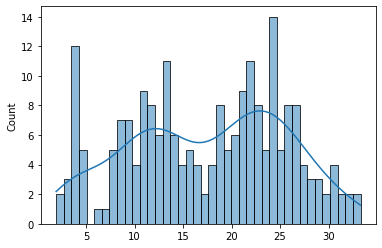

In [46]:
sns.histplot(y_holdout,bins=40,kde=True)

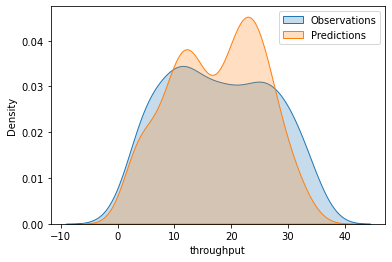

In [47]:
fig,ax = plt.subplots()

sns.kdeplot(y_test, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_holdout, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

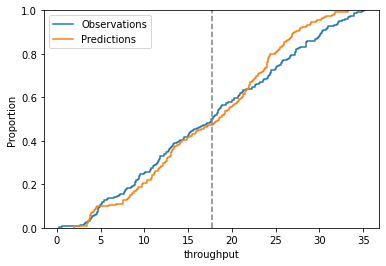

In [48]:
fig,ax = plt.subplots()

sns.ecdfplot(y_test, ax=ax, label='Observations')
sns.ecdfplot(y_holdout, ax=ax,label='Predictions')
plt.axvline(x=y_test.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_holdout)
mse = mean_squared_error(y_test,y_holdout)
rmse = np.sqrt(mse)

In [50]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=[f'{model_name}'])
err_df

,RandFoNFE
MAE,2.841433
MSE,16.664902
RMSE,4.082267


In [51]:
err_df.to_csv(f'./holdout-test/{model_name}-err.csv')
# mean_scores.to_csv(f'./opt-model-err/{model_name}-err.csv')

In [52]:
res = y_test - y_holdout
res.describe().drop('count')

mean     0.285570
std      4.081770
min    -14.072515
25%     -1.593012
50%      0.291681
75%      2.165817
max     20.563412
Name: throughput, dtype: float64

<AxesSubplot:xlabel='throughput', ylabel='Count'>

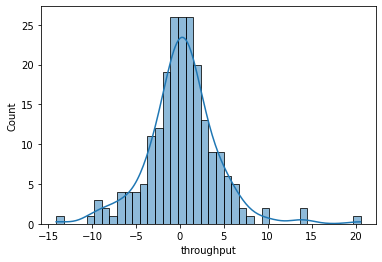

In [53]:
sns.histplot(data=res, kde=True,bins=40)

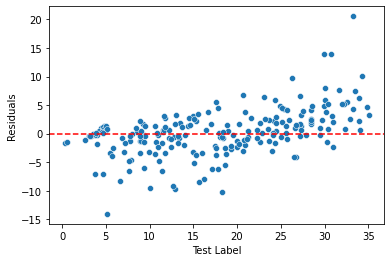

In [54]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

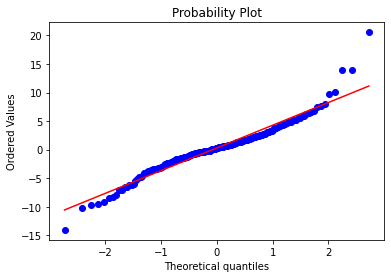

In [55]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

# Export Optimized Model

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [57]:
# MODIFY! 
X = scaler.transform(X)

op_model = score_model

op_model.fit(X,y)

RandomForestRegressor()

In [58]:
y_pred = op_model.predict(X)

<AxesSubplot:ylabel='Count'>

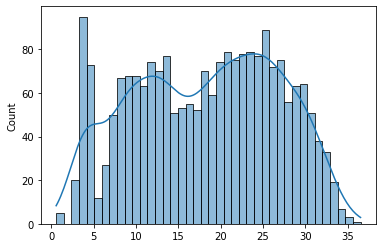

In [59]:
sns.histplot(y_pred,bins=40,kde=True)

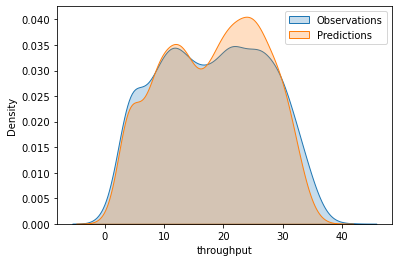

In [60]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

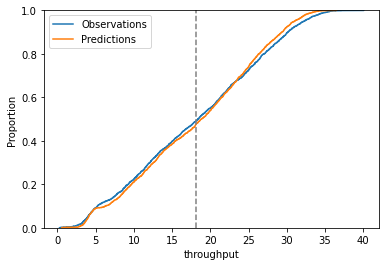

In [61]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [62]:
mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)

In [63]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=[f'{model_name}'])
err_df

,RandFoNFE
MAE,1.025789
MSE,2.081408
RMSE,1.442708


In [64]:
err_df.to_csv(f'./model-err/{model_name}-err.csv')
# mean_scores.to_csv(f'./opt-model-err/{model_name}-err.csv')

In [65]:
from joblib import dump, load
dump(op_model, f'./opt-models/{model_name}-model.joblib')

['./opt-models/RandFoNFE-model.joblib']

In [66]:
res = y - y_pred
res.describe().drop('count')

mean   -0.034086
std     1.442643
min    -7.488610
25%    -0.702411
50%    -0.006381
75%     0.724668
max     7.235397
Name: throughput, dtype: float64

<AxesSubplot:xlabel='throughput', ylabel='Count'>

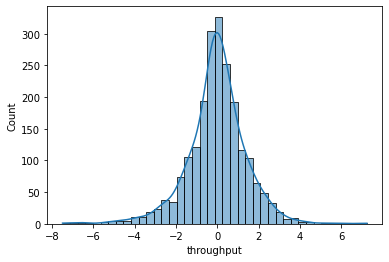

In [67]:
sns.histplot(data=res, kde=True,bins=40)

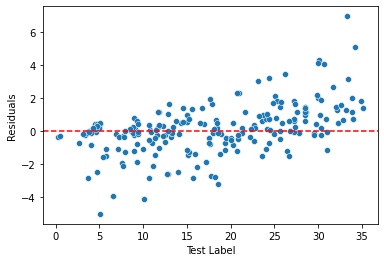

In [68]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

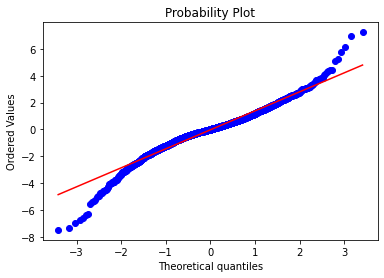

In [69]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

DONE!